❌ No GPU detected, running on CPU.
✅ Found 8 SAR class folders: ['BTR_60', 'ZIL131', 'T62', 'ZSU_23_4', '2S1', 'SLICY', 'BRDM_2', 'D7']
⚠️ Warning: No Optical image found for SLICY, using placeholder...
✅ Successfully loaded 8 SAR and Optical image pairs.


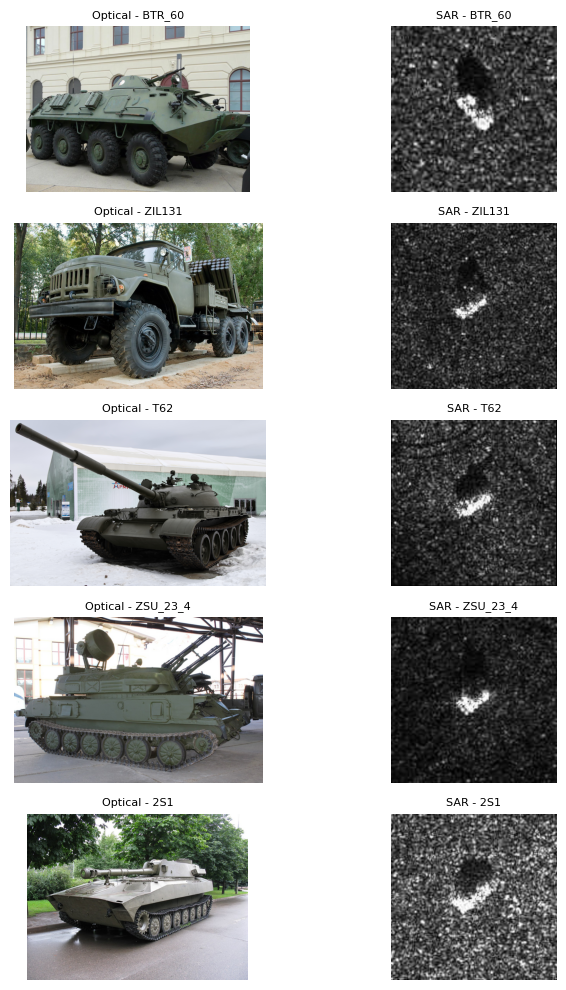

In [ ]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ✅ Enable GPU Usage & Optimize Memory Growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print(f"✅ GPU Detected: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("❌ No GPU detected, running on CPU.")

# ✅ Define Dataset Paths
SAR_DATASET_PATH = "/root/.cache/kagglehub/datasets/atreyamajumdar/mstar-dataset-8-classes/versions/1/Padded_imgs"
OPTICAL_ROOT = "/content/optical-dataset/optical-dataset"  # Updated Path

# ✅ Class Labels (Mapping Optical Filenames to SAR Class Names)
optical_class_map = {
    "ZIL-131": "ZIL131",
    "2S1": "2S1",
    "BRDM-2": "BRDM_2",
    "D7": "D7",
    "T-62": "T62",
    "ZSU-23-4": "ZSU_23_4",
    "BTR-60": "BTR_60"
}

# ✅ Get SAR Class Folders
sar_class_folders = [f.path for f in os.scandir(SAR_DATASET_PATH) if f.is_dir()]
print(f"✅ Found {len(sar_class_folders)} SAR class folders: {[os.path.basename(f) for f in sar_class_folders]}")

# ✅ Search for Optical Images (Handling .jpg, .jpeg, .JPG)
optical_image_paths = glob.glob(os.path.join(OPTICAL_ROOT, "*.jpg")) + \
                      glob.glob(os.path.join(OPTICAL_ROOT, "*.jpeg")) + \
                      glob.glob(os.path.join(OPTICAL_ROOT, "*.JPG"))

# ✅ Create a Dictionary Mapping SAR Class Names to Optical Images
optical_images_dict = {}
for img_path in optical_image_paths:
    filename = os.path.basename(img_path).split('.')[0]  # Remove extension
    for optical_name, sar_name in optical_class_map.items():
        if filename.lower() == optical_name.lower():  # Case-insensitive matching
            optical_images_dict[sar_name] = img_path
            break  # Stop searching after first match

# ✅ Function to Load SAR and Optical Images
def load_sar_optical_images(sar_class_folders):
    image_pairs = []  # Store (SAR Image, Optical Image, Class Label)

    for class_path in sar_class_folders:
        class_name = os.path.basename(class_path)  # Extract class name

        # ✅ Find Optical Image Using Mapped Names
        optical_img_path = optical_images_dict.get(class_name, None)

        if optical_img_path is None:
            print(f"⚠️ Warning: No Optical image found for {class_name}, using placeholder...")
            optical_img = None
        else:
            optical_img = cv2.imread(optical_img_path)  # Load Optical image
            if optical_img is None:
                print(f"⚠️ Corrupted Optical image: {optical_img_path}, using placeholder...")

        # ✅ Load SAR Images
        sar_images = glob.glob(os.path.join(class_path, "*.JPG"))
        if not sar_images:
            print(f"⚠️ Warning: No SAR images found in {class_name}, skipping...")
            continue

        for sar_img_path in sar_images[:1]:  # Select only 1 image per class for visualization
            sar_img = cv2.imread(sar_img_path, cv2.IMREAD_GRAYSCALE)
            if sar_img is None:
                print(f"⚠️ Corrupted SAR image: {sar_img_path}, skipping...")
                continue

            image_pairs.append((sar_img, optical_img, class_name))  # Store SAR, Optical, and Label

    return image_pairs

# ✅ Load SAR and Optical Images
image_pairs = load_sar_optical_images(sar_class_folders)

# ✅ Check if images are loaded
if len(image_pairs) == 0:
    raise ValueError("❌ No valid SAR or Optical images were loaded! Check dataset structure.")

print(f"✅ Successfully loaded {len(image_pairs)} SAR and Optical image pairs.")

# ✅ Generate Placeholder Optical Images (if needed)
def generate_placeholder_image(size=(64, 64, 3)):  # Reduced size
    """Generate a plain color placeholder image (simulating an Optical image)."""
    return np.full(size, (160, 140, 120), dtype=np.uint8)  # Brownish tone for placeholder

# ✅ Visualization Function (Horizontal Display)
def visualize_sar_optical_pairs(image_pairs, num_samples=5):
    num_samples = min(num_samples, len(image_pairs))  # Ensure we don't exceed available images
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 2))  # Horizontal layout

    for i, (sar_img, optical_img, label) in enumerate(image_pairs[:num_samples]):
        if optical_img is None:
            optical_img = generate_placeholder_image()

        # Optical Image (Left)
        axes[i, 0].imshow(cv2.cvtColor(optical_img, cv2.COLOR_BGR2RGB))
        axes[i, 0].axis("off")
        axes[i, 0].set_title(f"Optical - {label}", fontsize=8)  # Smaller font size

        # SAR Image (Right)
        axes[i, 1].imshow(sar_img, cmap="gray")
        axes[i, 1].axis("off")
        axes[i, 1].set_title(f"SAR - {label}", fontsize=8)  # Smaller font size

    plt.tight_layout()
    plt.show()

# ✅ Display 5 Sample Images
visualize_sar_optical_pairs(image_pairs, num_samples=5)


❌ No GPU detected, running on CPU.
✅ Found 8 SAR class folders: ['BTR_60', 'ZIL131', 'T62', 'ZSU_23_4', '2S1', 'SLICY', 'BRDM_2', 'D7']
⚠️ Warning: No Optical image found for SLICY, using placeholder...
✅ Successfully loaded 8 SAR and Optical image pairs.


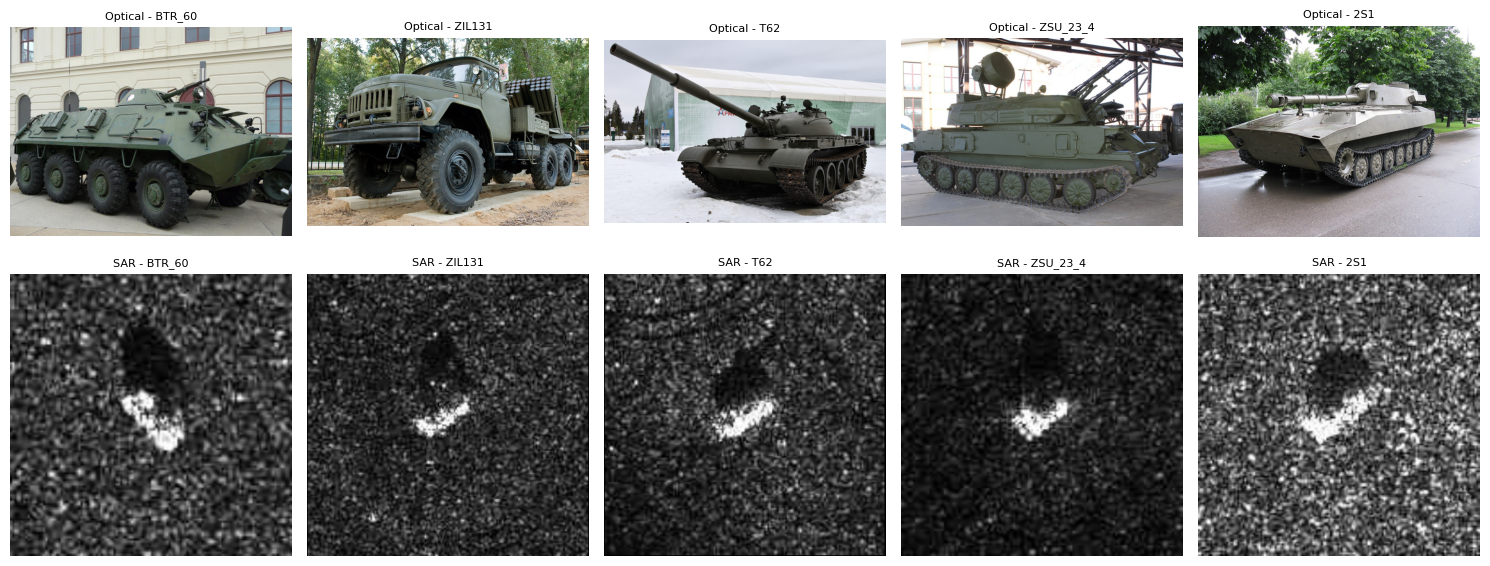

❌ No GPU detected, running on CPU.
✅ Found 8 SAR class folders: ['BTR_60', 'ZIL131', 'T62', 'ZSU_23_4', '2S1', 'SLICY', 'BRDM_2', 'D7']
⚠️ Warning: No Optical image found for SLICY, using placeholder...
✅ Successfully loaded 8 SAR and Optical image pairs.


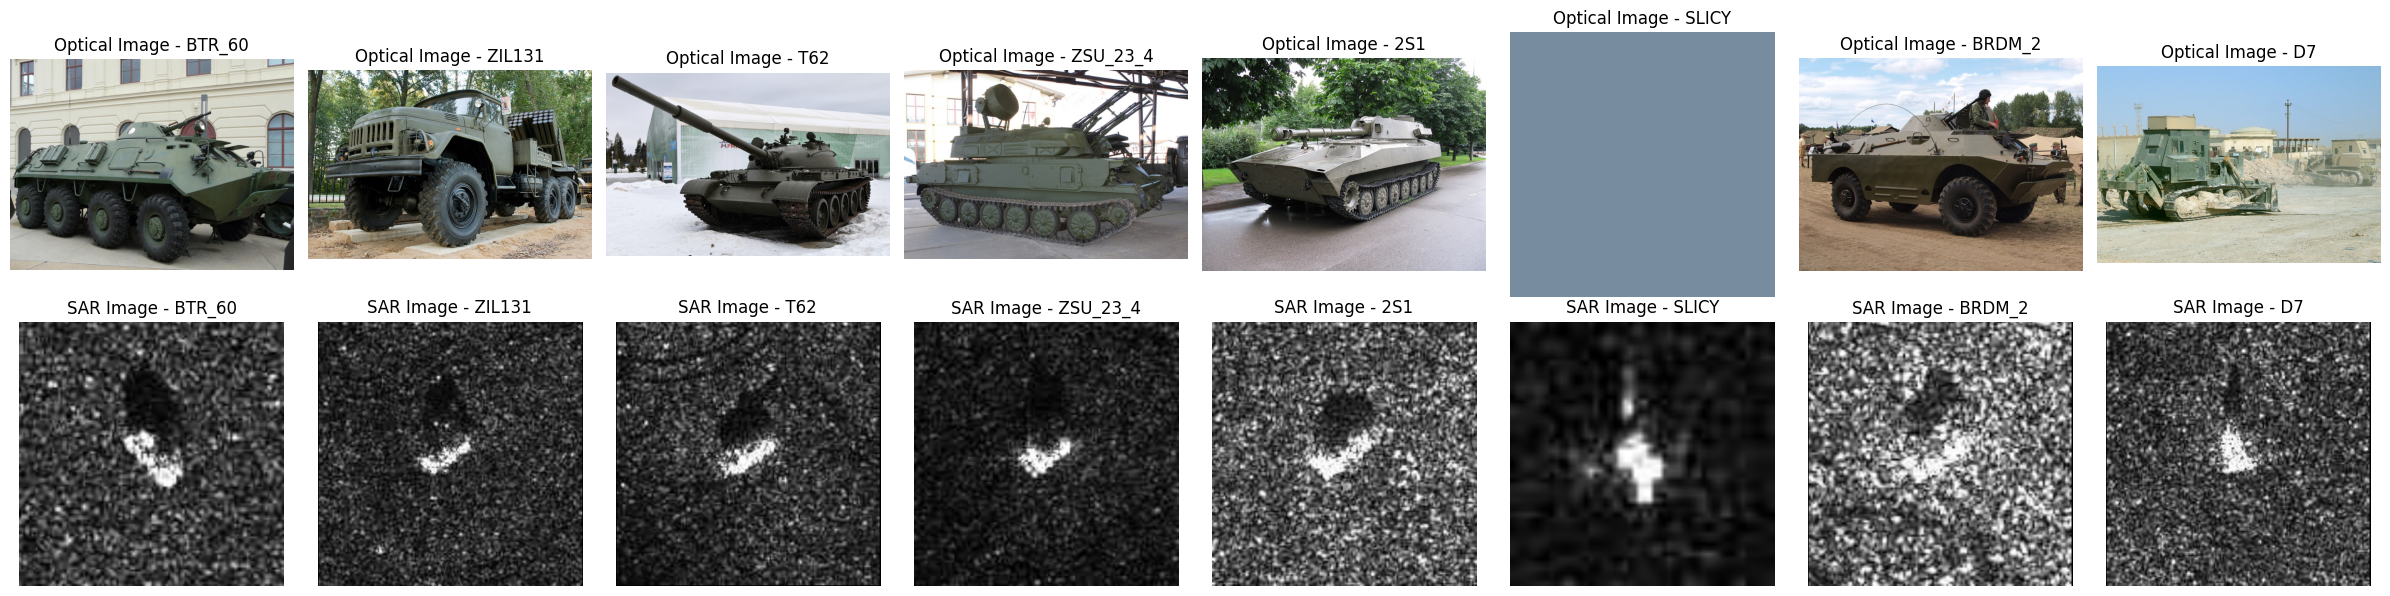

In [ ]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ✅ Enable GPU Usage & Optimize Memory Growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print(f"✅ GPU Detected: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("❌ No GPU detected, running on CPU.")

# ✅ Define Dataset Paths
SAR_DATASET_PATH = "/root/.cache/kagglehub/datasets/atreyamajumdar/mstar-dataset-8-classes/versions/1/Padded_imgs"
OPTICAL_ROOT = "/content/optical-dataset/optical-dataset"  # Updated Path

# ✅ Class Labels (Mapping Optical Filenames to SAR Class Names)
optical_class_map = {
    "ZIL-131": "ZIL131",
    "2S1": "2S1",
    "BRDM-2": "BRDM_2",
    "D7": "D7",
    "T-62": "T62",
    "ZSU-23-4": "ZSU_23_4",
    "BTR-60": "BTR_60"
}

# ✅ Get SAR Class Folders
sar_class_folders = [f.path for f in os.scandir(SAR_DATASET_PATH) if f.is_dir()]
print(f"✅ Found {len(sar_class_folders)} SAR class folders: {[os.path.basename(f) for f in sar_class_folders]}")

# ✅ Search for Optical Images (Handling .jpg, .jpeg, .JPG)
optical_image_paths = glob.glob(os.path.join(OPTICAL_ROOT, "*.jpg")) + \
                      glob.glob(os.path.join(OPTICAL_ROOT, "*.jpeg")) + \
                      glob.glob(os.path.join(OPTICAL_ROOT, "*.JPG"))

# ✅ Create a Dictionary Mapping SAR Class Names to Optical Images
optical_images_dict = {}
for img_path in optical_image_paths:
    filename = os.path.basename(img_path).split('.')[0]  # Remove extension
    for optical_name, sar_name in optical_class_map.items():
        if filename.lower() == optical_name.lower():  # Case-insensitive matching
            optical_images_dict[sar_name] = img_path
            break  # Stop searching after first match

# ✅ Function to Load SAR and Optical Images
def load_sar_optical_images(sar_class_folders):
    image_pairs = []  # Store (SAR Image, Optical Image, Class Label)

    for class_path in sar_class_folders:
        class_name = os.path.basename(class_path)  # Extract class name

        # ✅ Find Optical Image Using Mapped Names
        optical_img_path = optical_images_dict.get(class_name, None)

        if optical_img_path is None:
            print(f"⚠️ Warning: No Optical image found for {class_name}, using placeholder...")
            optical_img = None
        else:
            optical_img = cv2.imread(optical_img_path)  # Load Optical image
            if optical_img is None:
                print(f"⚠️ Corrupted Optical image: {optical_img_path}, using placeholder...")

        # ✅ Load SAR Images
        sar_images = glob.glob(os.path.join(class_path, "*.JPG"))
        if not sar_images:
            print(f"⚠️ Warning: No SAR images found in {class_name}, skipping...")
            continue

        for sar_img_path in sar_images[:1]:  # Select only 1 image per class for visualization
            sar_img = cv2.imread(sar_img_path, cv2.IMREAD_GRAYSCALE)
            if sar_img is None:
                print(f"⚠️ Corrupted SAR image: {sar_img_path}, skipping...")
                continue

            image_pairs.append((sar_img, optical_img, class_name))  # Store SAR, Optical, and Label

    return image_pairs

# ✅ Load SAR and Optical Images
image_pairs = load_sar_optical_images(sar_class_folders)

# ✅ Check if images are loaded
if len(image_pairs) == 0:
    raise ValueError("❌ No valid SAR or Optical images were loaded! Check dataset structure.")

print(f"✅ Successfully loaded {len(image_pairs)} SAR and Optical image pairs.")

# ✅ Generate Placeholder Optical Images (if needed)
def generate_placeholder_image(size=(64, 64, 3)):  # Reduced size
    """Generate a plain color placeholder image (simulating an Optical image)."""
    return np.full(size, (160, 140, 120), dtype=np.uint8)  # Brownish tone for placeholder

# ✅ Visualization Function (Two-Row Horizontal Display with Normal Titles)
def visualize_sar_optical_pairs(image_pairs, num_samples=5):
    num_samples = min(num_samples, len(image_pairs))  # Ensure we don't exceed available images

    fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 3, 6))  # Two rows, multiple columns

    for i, (sar_img, optical_img, label) in enumerate(image_pairs[:num_samples]):
        if optical_img is None:
            optical_img = generate_placeholder_image()

        # Optical Image (Top Row)
        axes[0, i].imshow(cv2.cvtColor(optical_img, cv2.COLOR_BGR2RGB))
        axes[0, i].axis("off")
        axes[0, i].set_title(f"Optical Image - {label}", fontsize=12)  # Normal font size

        # SAR Image (Bottom Row)
        axes[1, i].imshow(sar_img, cmap="gray")
        axes[1, i].axis("off")
        axes[1, i].set_title(f"SAR Image - {label}", fontsize=12)  # Normal font size

    plt.tight_layout()
    plt.show()

# ✅ Display 5 Sample Images
visualize_sar_optical_pairs(image_pairs, num_samples=8)


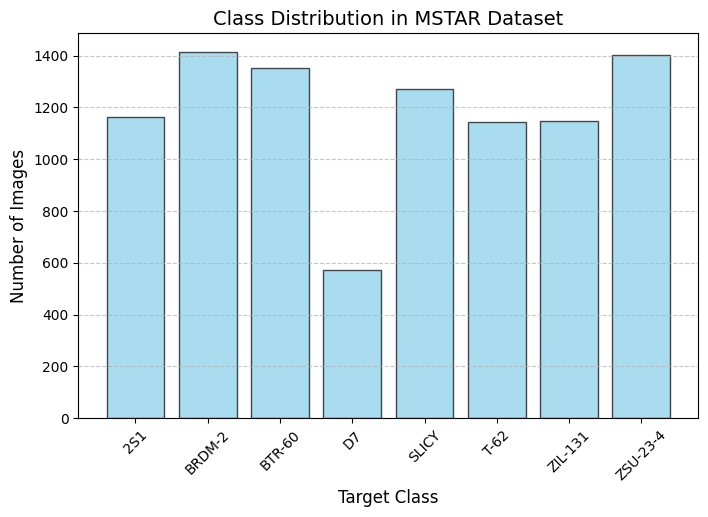

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# ✅ Define Dataset Path (Update if Needed)
SAR_DATASET_PATH = "/root/.cache/kagglehub/datasets/atreyamajumdar/mstar-dataset-8-classes/versions/1/Padded_imgs"

# ✅ Class Labels (Matching Visualization Format)
class_labels = {
    "2S1": "2S1",
    "BRDM_2": "BRDM-2",
    "BTR_60": "BTR-60",
    "D7": "D7",
    "SLICY": "SLICY",
    "T62": "T-62",
    "ZIL131": "ZIL-131",
    "ZSU_23_4": "ZSU-23-4"
}

# ✅ Count Images for Each Class
class_counts = {}
for class_name in class_labels.keys():
    class_folder = os.path.join(SAR_DATASET_PATH, class_name)
    if os.path.exists(class_folder):
        num_images = len([f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.jpeg', '.JPG', '.png'))])
        class_counts[class_labels[class_name]] = num_images
    else:
        class_counts[class_labels[class_name]] = 0  # If class folder is missing

# ✅ Sort Classes Alphabetically for Display
class_counts = dict(sorted(class_counts.items()))

# ✅ Extract Data for Plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# ✅ Plot the Class Distribution
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Target Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class Distribution in MSTAR Dataset", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ✅ Show the Plot
plt.show()


✅ Found 7 SAR class folders: ['BTR_60', 'ZIL131', 'T62', 'ZSU_23_4', '2S1', 'BRDM_2', 'D7']
✅ Successfully loaded 7 SAR and Optical image pairs.


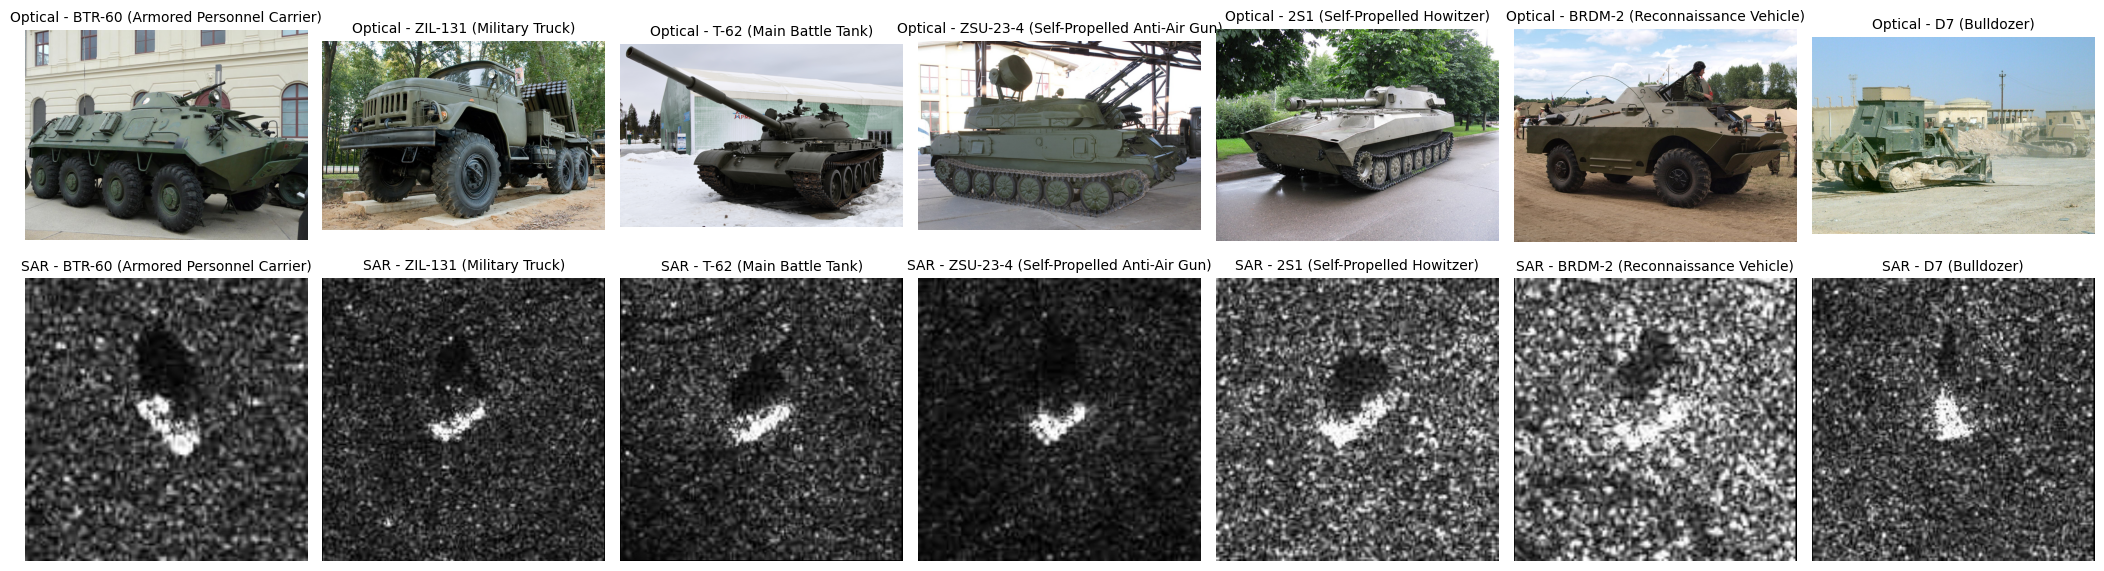

In [ ]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

# ✅ Define Dataset Paths
SAR_DATASET_PATH = "/root/.cache/kagglehub/datasets/atreyamajumdar/mstar-dataset-8-classes/versions/1/Padded_imgs"
OPTICAL_ROOT = "/content/optical-dataset/optical-dataset"  # Updated Path

# ✅ Class Labels (Excluding "SLICY")
class_labels = {
    "2S1": "2S1 (Self-Propelled Howitzer)",
    "BRDM_2": "BRDM-2 (Reconnaissance Vehicle)",
    "BTR_60": "BTR-60 (Armored Personnel Carrier)",
    "D7": "D7 (Bulldozer)",
    "T62": "T-62 (Main Battle Tank)",
    "ZIL131": "ZIL-131 (Military Truck)",
    "ZSU_23_4": "ZSU-23-4 (Self-Propelled Anti-Air Gun)"
}

# ✅ Get SAR Class Folders (Excluding "SLICY")
sar_class_folders = [f.path for f in os.scandir(SAR_DATASET_PATH) if f.is_dir() and os.path.basename(f.path) in class_labels]
print(f"✅ Found {len(sar_class_folders)} SAR class folders: {[os.path.basename(f) for f in sar_class_folders]}")

# ✅ Search for Optical Images (Handling .jpg, .jpeg, .JPG)
optical_image_paths = glob.glob(os.path.join(OPTICAL_ROOT, "*.*"))  # Finds all images

# ✅ Improved Optical Image Matching (Handles Hyphens, Underscores & Case Sensitivity)
optical_images_dict = {}
for img_path in optical_image_paths:
    filename = os.path.basename(img_path).split('.')[0].lower().replace("-", "").replace("_", "")  # Remove separators

    for sar_name in class_labels.keys():
        sar_normalized = sar_name.lower().replace("-", "").replace("_", "")  # Normalize SAR class names

        if filename == sar_normalized:  # Exact match after normalization
            optical_images_dict[sar_name] = img_path
            break  # Stop after first match

# ✅ Function to Load SAR and Optical Images
def load_sar_optical_images(sar_class_folders):
    image_pairs = []  # Store (SAR Image, Optical Image, Class Label)

    for class_path in sar_class_folders:
        class_name = os.path.basename(class_path)  # Extract class name

        # ✅ Find Optical Image Using Mapped Names
        optical_img_path = optical_images_dict.get(class_name, None)

        if optical_img_path is None:
            print(f"⚠️ Warning: No Optical image found for {class_name}, using placeholder...")
            optical_img = None
        else:
            optical_img = cv2.imread(optical_img_path)  # Load Optical image
            if optical_img is None:
                print(f"⚠️ Corrupted Optical image: {optical_img_path}, using placeholder...")

        # ✅ Load SAR Images
        sar_images = glob.glob(os.path.join(class_path, "*.JPG"))
        if not sar_images:
            print(f"⚠️ Warning: No SAR images found in {class_name}, skipping...")
            continue

        for sar_img_path in sar_images[:1]:  # Select only 1 image per class for visualization
            sar_img = cv2.imread(sar_img_path, cv2.IMREAD_GRAYSCALE)
            if sar_img is None:
                print(f"⚠️ Corrupted SAR image: {sar_img_path}, skipping...")
                continue

            image_pairs.append((sar_img, optical_img, class_labels[class_name]))  # Store SAR, Optical, and Label

    return image_pairs

# ✅ Load SAR and Optical Images
image_pairs = load_sar_optical_images(sar_class_folders)

# ✅ Check if images are loaded
if len(image_pairs) == 0:
    raise ValueError("❌ No valid SAR or Optical images were loaded! Check dataset structure.")

print(f"✅ Successfully loaded {len(image_pairs)} SAR and Optical image pairs.")

# ✅ Generate Placeholder Optical Images (if needed)
def generate_placeholder_image(size=(128, 128, 3)):  # Adjust size if needed
    """Generate a plain color placeholder image (simulating an Optical image)."""
    return np.full(size, (160, 140, 120), dtype=np.uint8)  # Brownish tone for placeholder

# ✅ Visualization Function (Single Row Layout)
def visualize_sar_optical_pairs(image_pairs):
    num_samples = 7  # We want exactly 7 images (excluding "SLICY")
    fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 3, 6))  # One row for Optical, one for SAR

    for i, (sar_img, optical_img, label) in enumerate(image_pairs[:num_samples]):
        if optical_img is None:
            optical_img = generate_placeholder_image()

        # ✅ Optical Image (Top Row)
        axes[0, i].imshow(cv2.cvtColor(optical_img, cv2.COLOR_BGR2RGB))
        axes[0, i].axis("off")
        axes[0, i].set_title(f"Optical - {label}", fontsize=10)  # Normal font size

        # ✅ SAR Image (Bottom Row)
        axes[1, i].imshow(sar_img, cmap="gray")
        axes[1, i].axis("off")
        axes[1, i].set_title(f"SAR - {label}", fontsize=10)  # Normal font size

    plt.tight_layout()
    plt.show()

# ✅ Display Visualization
visualize_sar_optical_pairs(image_pairs)


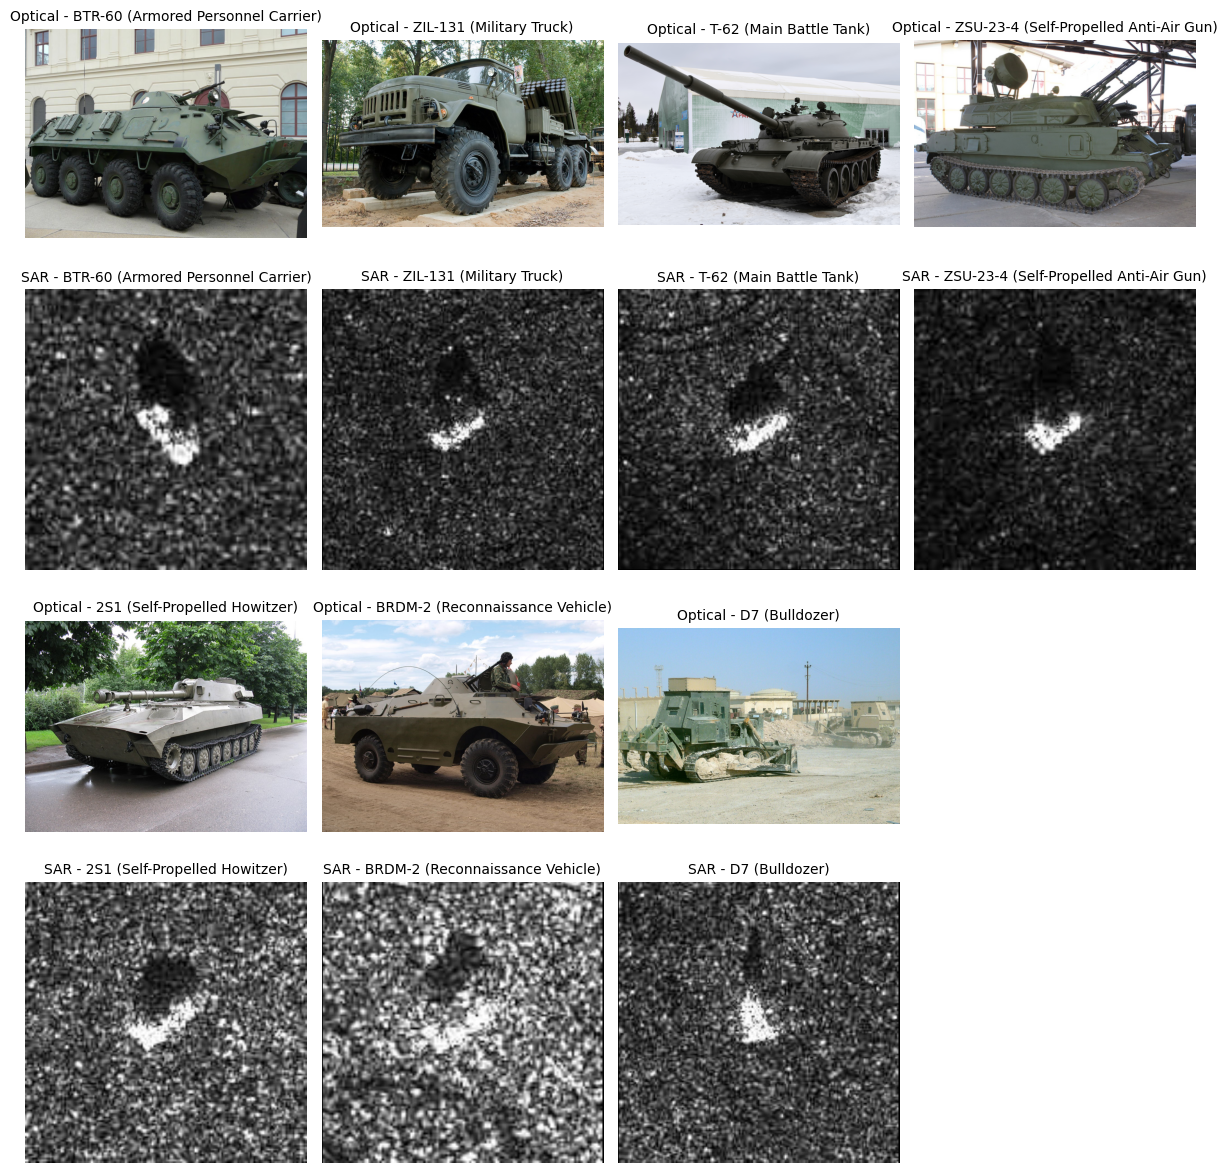

In [ ]:
import math

def visualize_sar_optical_pairs(image_pairs, images_per_row=4):
    num_samples = len(image_pairs)  # Get the total number of samples
    num_rows = math.ceil(num_samples / images_per_row)  # Calculate required rows

    fig, axes = plt.subplots(num_rows * 2, images_per_row, figsize=(images_per_row * 3, num_rows * 6))

    for i, (sar_img, optical_img, label) in enumerate(image_pairs):
        row = (i // images_per_row) * 2  # Calculate correct row index
        col = i % images_per_row  # Column index

        if optical_img is None:
            optical_img = generate_placeholder_image()

        # Optical Image (Top row of each set)
        axes[row, col].imshow(cv2.cvtColor(optical_img, cv2.COLOR_BGR2RGB))
        axes[row, col].axis("off")
        axes[row, col].set_title(f"Optical - {label}", fontsize=10)

        # SAR Image (Bottom row of each set)
        axes[row + 1, col].imshow(sar_img, cmap="gray")
        axes[row + 1, col].axis("off")
        axes[row + 1, col].set_title(f"SAR - {label}", fontsize=10)

    # Hide unused subplots if necessary
    for i in range(num_samples, num_rows * images_per_row):
        row = (i // images_per_row) * 2
        col = i % images_per_row
        axes[row, col].axis("off")
        axes[row + 1, col].axis("off")

    plt.tight_layout()
    plt.show()

# ✅ Display Visualization
visualize_sar_optical_pairs(image_pairs)


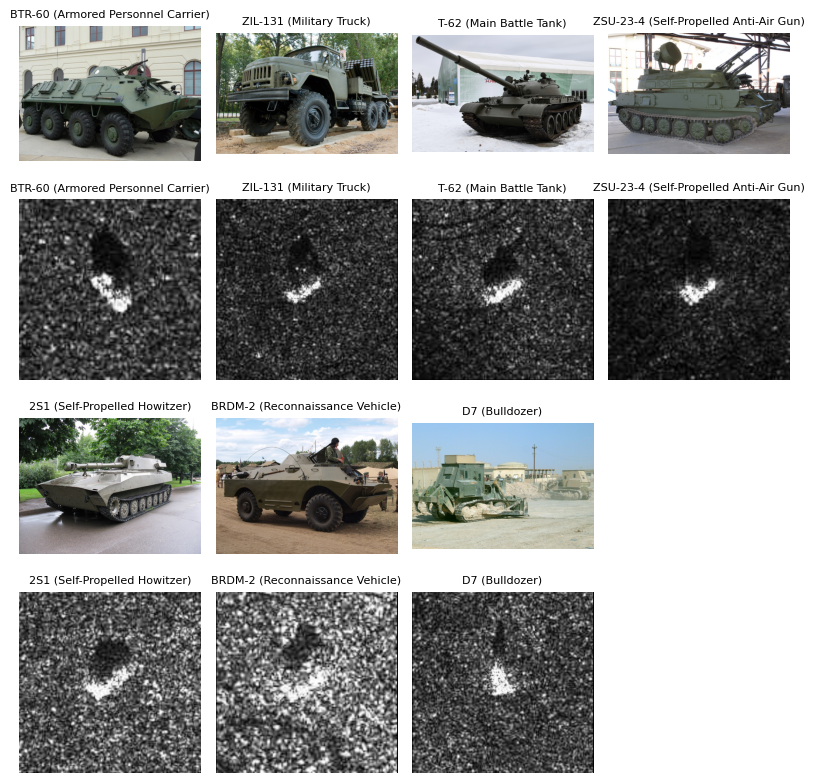

In [ ]:
import math

def visualize_sar_optical_pairs(image_pairs, images_per_row=4):
    num_samples = len(image_pairs)  # Get the total number of samples
    num_rows = math.ceil(num_samples / images_per_row)  # Calculate required rows

    fig, axes = plt.subplots(num_rows * 2, images_per_row, figsize=(images_per_row * 2, num_rows * 4))  # Adjust size for IEEE template

    for i, (sar_img, optical_img, label) in enumerate(image_pairs):
        row = (i // images_per_row) * 2  # Calculate correct row index
        col = i % images_per_row  # Column index

        if optical_img is None:
            optical_img = generate_placeholder_image()

        # Optical Image (Top row of each set)
        axes[row, col].imshow(cv2.cvtColor(optical_img, cv2.COLOR_BGR2RGB))
        axes[row, col].axis("off")
        axes[row, col].set_title(f"{label}", fontsize=8)  # Smaller font size

        # SAR Image (Bottom row of each set)
        axes[row + 1, col].imshow(sar_img, cmap="gray")
        axes[row + 1, col].axis("off")
        axes[row + 1, col].set_title(f"{label}", fontsize=8)  # Smaller font size

    # Hide unused subplots if necessary
    for i in range(num_samples, num_rows * images_per_row):
        row = (i // images_per_row) * 2
        col = i % images_per_row
        axes[row, col].axis("off")
        axes[row + 1, col].axis("off")

    plt.tight_layout()
    plt.show()

# ✅ Display Visualization
visualize_sar_optical_pairs(image_pairs)
